# Importing Libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.stats.diagnostic import normal_ad, het_breuschpagan
import statsmodels.api as sm
from sklearn.preprocessing import minmax_scale

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

# Datasets

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB



    fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
    volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
    citric acid: found in small quantities, citric acid can add ‘freshness’ and flavor to wines
    residual sugar: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
    chlorides: the amount of salt in the wine
    free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
    total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
    density: the density of water is close to that of water depending on the percent alcohol and sugar content
    pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
    sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
    quality: score between 0 and 10
    alcohol: the percent alcohol content of the wine - output varaible


#Missing Data 

<AxesSubplot:>

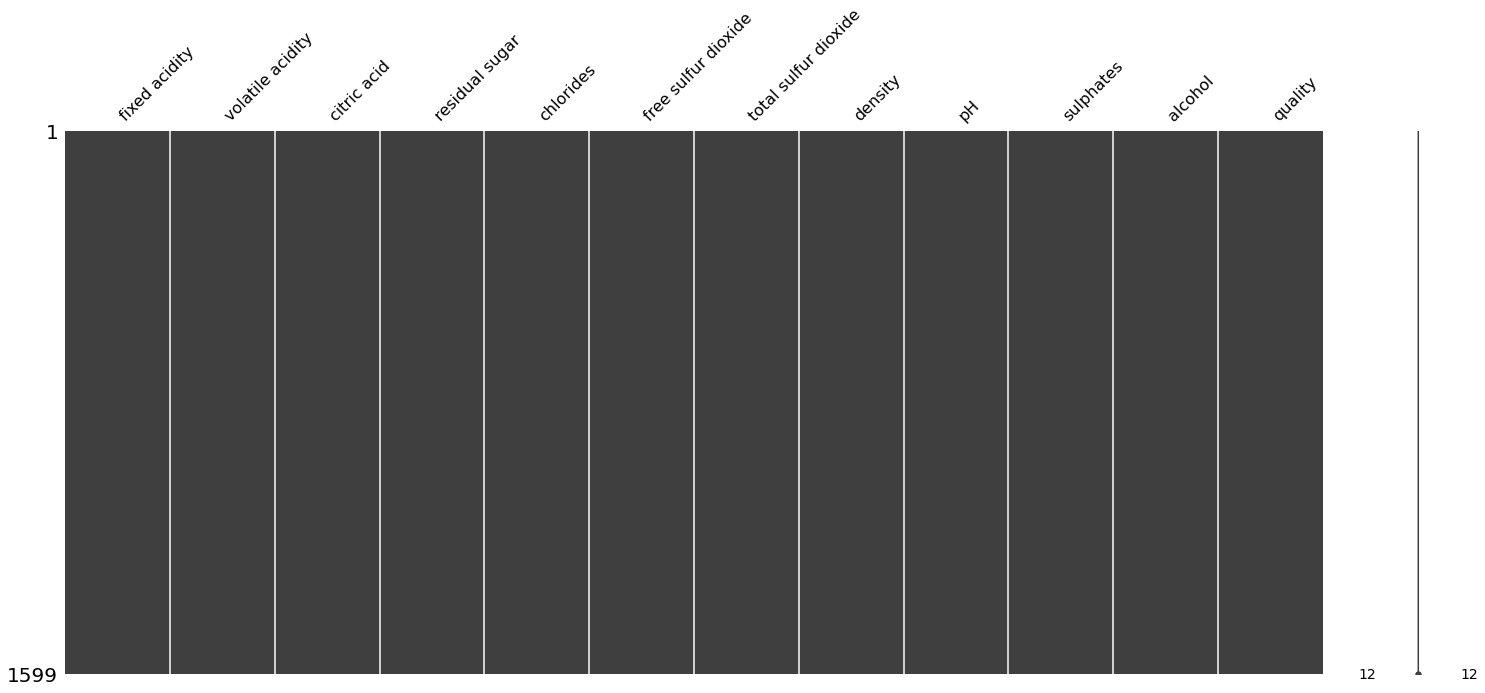

In [5]:
msno.matrix(df)

# Data visulization

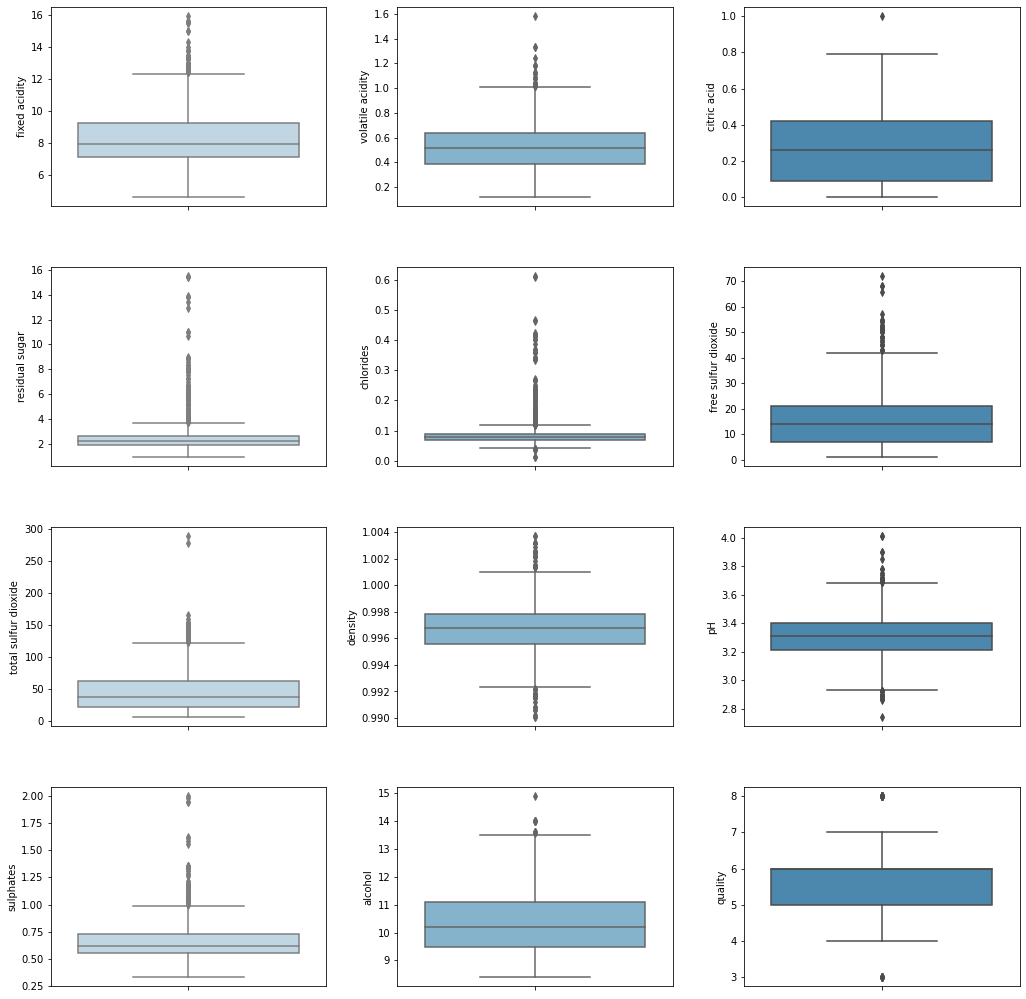

In [6]:
def plotBoxplot(data):
    fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(15,15))
    fig.tight_layout(pad=4.0)

    col = 0
    row = 0
    colors = ['#bad9e9', '#7ab6d6', '#3c8abd']

    for i, column in enumerate(data.columns):
        sns.boxplot(y=column, data=data, ax=axes[row][col], color=colors[col])

        if (i + 1) % 3 == 0:
            row += 1
            col = 0
        else:
            col += 1
            
plotBoxplot(df)

No Multicollinearity among Independant Varaibles

<AxesSubplot:>

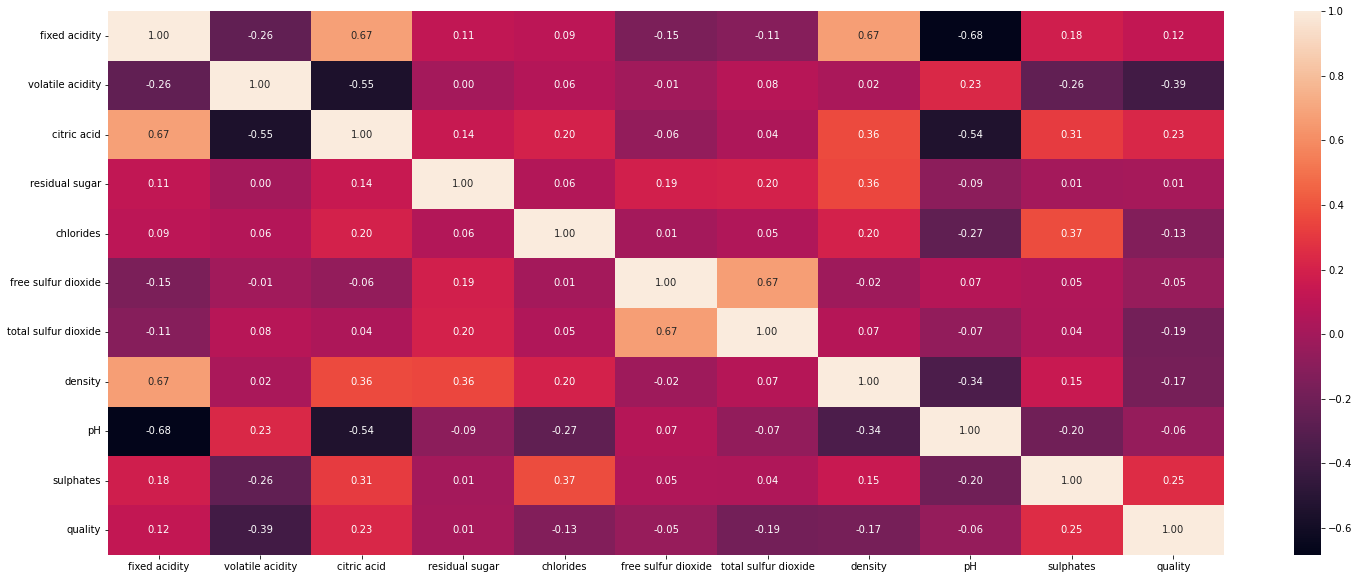

In [7]:
plt.figure(figsize=(25, 10))
sns.heatmap(df.loc[:, df.columns != 'alcohol'].corr(), annot=True, fmt='.2f')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

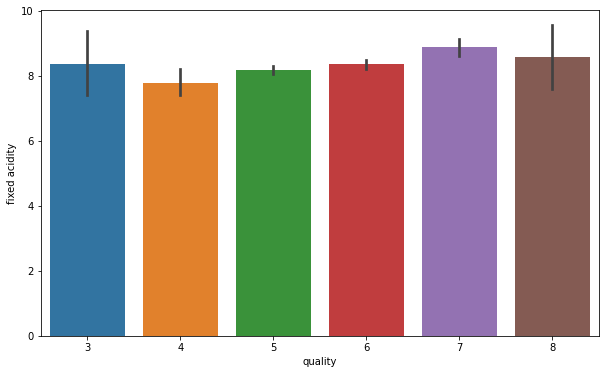

In [8]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

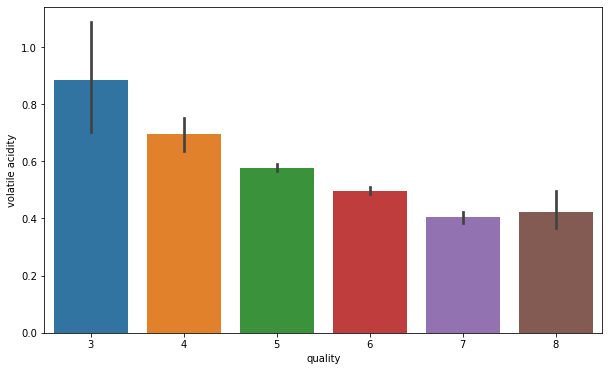

In [9]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

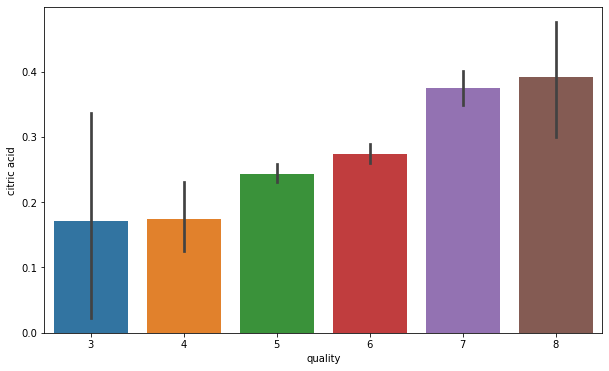

In [10]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

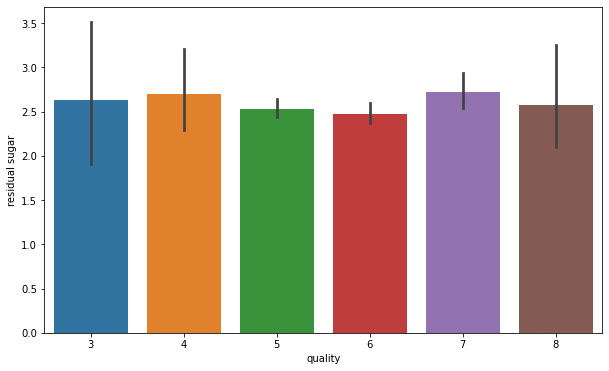

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

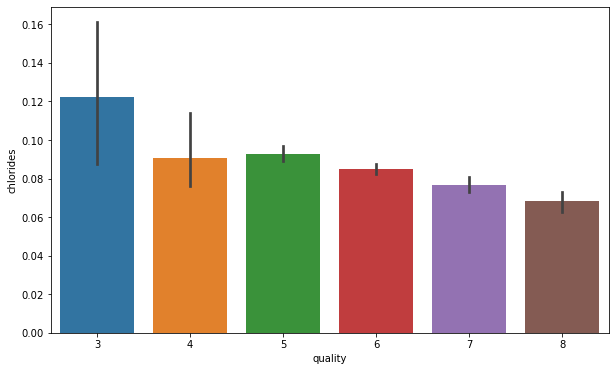

In [12]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

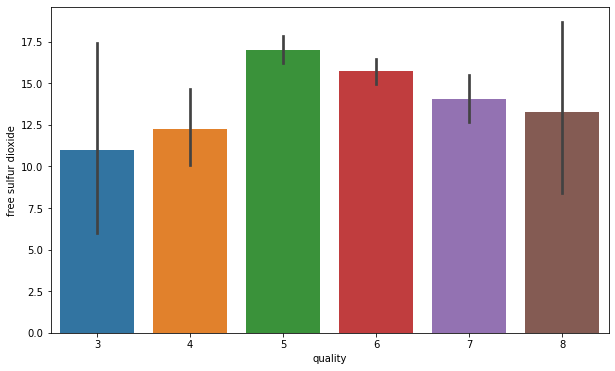

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

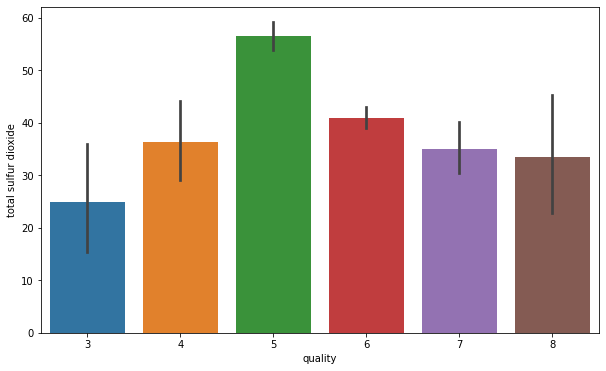

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

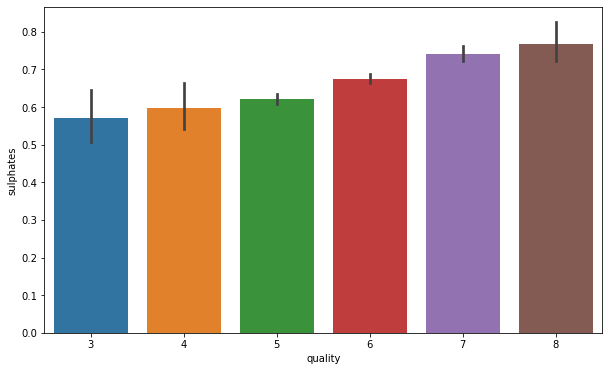

In [15]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

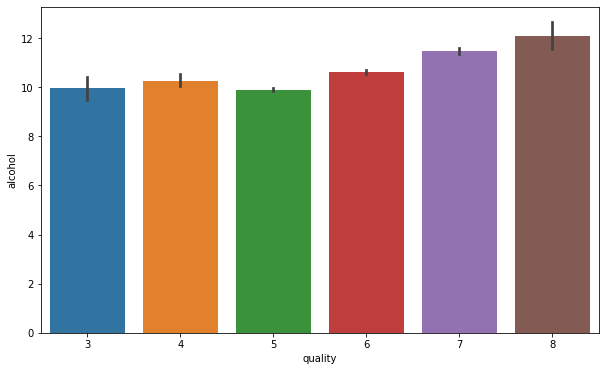

In [16]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

<AxesSubplot:xlabel='quality', ylabel='count'>

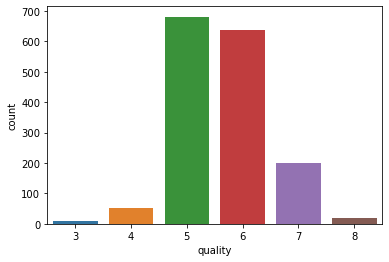

In [17]:
sns.countplot(df['quality'])

# Features and Labels

In [18]:
#create tmp train/test split for assumptions test
X = df.drop(['alcohol'], axis=1)
y = df['alcohol']

In [19]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [20]:
print(y)

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64


#Splitting the dataset

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=50)

In [22]:
print(x_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
940             9.6             0.330         0.52             2.2      0.074   
1287            8.0             0.600         0.08             2.6      0.056   
1397            7.3             0.590         0.26             2.0      0.080   
356            11.5             0.410         0.52             3.0      0.080   
226             8.9             0.590         0.50             2.0      0.337   
...             ...               ...          ...             ...        ...   
70              7.7             0.630         0.08             1.9      0.076   
132             5.6             0.500         0.09             2.3      0.049   
1313            7.0             0.360         0.21             2.3      0.086   
109             8.1             0.785         0.52             2.0      0.122   
1504            7.5             0.380         0.57             2.3      0.106   

      free sulfur dioxide  

In [23]:
print(y_train)

940     12.4
1287    13.0
1397     9.9
356     11.0
226      9.5
        ... 
70       9.5
132     13.0
1313    10.1
109      9.3
1504    11.4
Name: alcohol, Length: 1119, dtype: float64


In [24]:
print(x_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
453            10.4              0.33         0.63            2.80      0.084   
1415            6.2              0.58         0.00            1.60      0.065   
1242            9.0              0.40         0.41            2.00      0.058   
885             8.9              0.75         0.14            2.50      0.086   
488            11.6              0.32         0.55            2.80      0.081   
...             ...               ...          ...             ...        ...   
34              5.2              0.32         0.25            1.80      0.103   
1493            7.7              0.54         0.26            1.90      0.089   
501            10.4              0.44         0.73            6.55      0.074   
1464            6.8              0.59         0.10            1.70      0.063   
911             9.1              0.28         0.46            9.00      0.114   

      free sulfur dioxide  

In [25]:
print(y_test)

453     11.2
1415     9.4
1242    12.2
885     10.5
488     10.8
        ... 
34       9.2
1493     9.7
501     12.0
1464     9.7
911     10.9
Name: alcohol, Length: 480, dtype: float64


In [26]:
print(x_train.shape)
print(y_train.shape)

(1119, 11)
(1119,)


In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# Model Setup

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

# Training

In [30]:
model.fit(x_train, y_train)

LinearRegression()

In [31]:
model.coef_

array([ 5.05933116e-01,  7.02590521e-01,  8.23700660e-01,  2.72656929e-01,
       -5.33212379e-01, -5.68110422e-03, -5.96585162e-04, -5.87493452e+02,
        3.78523263e+00,  8.59410226e-01,  2.47684402e-01])

In [32]:
model.intercept_

576.195693951099

#Evaluating Model

In [33]:
print(model.score(X, y))

0.6895215542808246


# Predicting on Test data

In [34]:
y_pred = model.predict(x_test)

In [35]:
r2_score(y_test, y_pred)

0.6648714487925994

# Visualisation

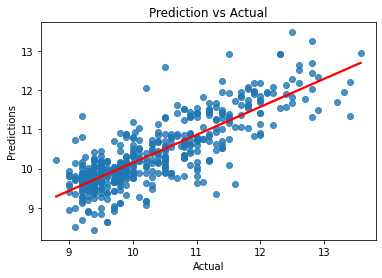

In [36]:
#plot the actual vs predicted values
sns.regplot(y_test, y_pred, line_kws={'color':'red'}, ci=None)

plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.title('Prediction vs Actual')

plt.show()

# References

    https://learningwithdata.com/posts/tylerfolkman/the-ultimate-guide-to-linear-regression/
    https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/
    https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8
    https://www.keboola.com/blog/linear-regression-machine-learning
    https://rstudio-pubs-static.s3.amazonaws.com/57835_c4ace81da9dc45438ad0c286bcbb4224.html
    https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
    https://www.kaggle.com/nareshbhat/outlier-the-silent-killer
    https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
    https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241
    https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5
    https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55
    https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
    https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55
    https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01

